# Load in the DataFrame

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Create your df here:
df = pd.read_csv("profiles.csv")

# Explore the data

In [4]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [5]:
df.height.describe()

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

# Question: Can we predict gender with heights using SVM? 

# Augment data

In [6]:
df['gender_code']=df.sex.map({'f':0, 'm':1})

In [7]:
do_smoke_mapping = {"no": 0, "sometimes": 1, "when drinking": 1, 
                  "yes": 1, "trying to quit": 1}
df["do_smoke"] = df.smokes.map(do_smoke_mapping)

# Plot the data
Let’s remove every row that has a NaN in 'smokes_code', 'drinks_code' and 'health_level'.

In [8]:
data=df.dropna(subset= ['gender_code', 'height'])

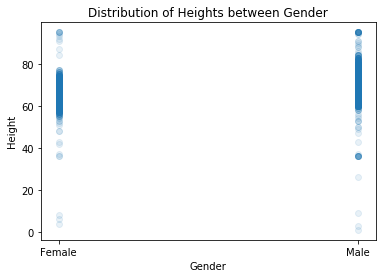

In [9]:
from matplotlib import pyplot as plt
plt.scatter(data['gender_code'],data['height'], alpha=0.1)
plt.xlabel("Gender")
plt.ylabel("Height")
plt.title('Distribution of Heights between Gender')
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.show()

In [10]:
female_data=data.loc[data["sex"]=='f']
male_data=data.loc[data["sex"]=='m']

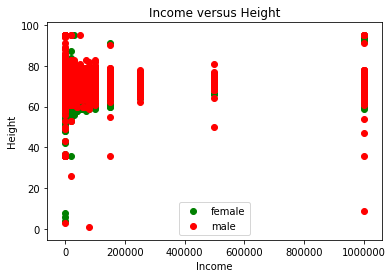

In [11]:
from matplotlib import pyplot as plt
plt.scatter(female_data['income'],female_data['height'], color='g')
plt.scatter(male_data['income'],male_data['height'], color='r')
plt.xlabel("Income")
plt.ylabel("Height")
plt.legend(['female', 'male'])
plt.title('Income versus Height')
plt.show()

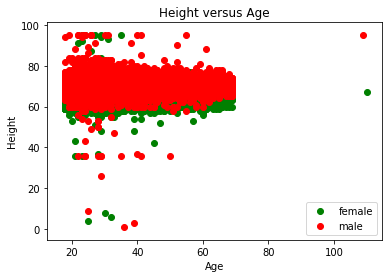

In [15]:
from matplotlib import pyplot as plt
plt.scatter(female_data['age'],female_data['height'], color='g')
plt.scatter(male_data['age'],male_data['height'], color='r')
plt.xlabel("Age")
plt.ylabel("Height")
plt.legend(['female', 'male'])
plt.title('Height versus Age')
plt.show()

### Building the SVM

First, we need to split the data into a training set and a validation set.

In [ ]:
data=df.dropna(subset= ['gender_code', 'height'])

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
training_set,  validation_set = train_test_split(data, 
                                                 random_state = 1)

Next, create an SVC named classifier with kernel = 'rbf'.

In [9]:
classifier=SVC(kernel='rbf')

In [10]:
classifier.fit(training_set[['height']],
              training_set['gender_code'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Accuracy of SVM

In [11]:
print(classifier.score(validation_set[['height']],
              validation_set['gender_code']))

0.8355131456025624


# Optimize SVM

In [14]:
highest=0
best_g=0
best_c=0
scores=[]
for g in range(1,10,3):
    for c in range(1,10,3):
        classifier=SVC(kernel='rbf', gamma=g, C=c)

        
        classifier.fit(training_set[['height']],
                      training_set['gender_code'])

        score=classifier.score(validation_set[['height']],
                      validation_set['gender_code'])
        print(g,c,score)
        scores.append(score)
        if score>highest: 
            highest=score
            best_g=g
            best_c=c
print(highest, best_g, best_c)

1 1 0.8355131456025624
1 4 0.8355131456025624
1 7 0.8355131456025624
4 1 0.8355798745495796
4 4 0.8355798745495796
4 7 0.8355798745495796
7 1 0.8355798745495796
7 4 0.8355798745495796
7 7 0.8355798745495796
0.8355798745495796 4 1


# Further Modeling

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
                                                 
def svm_builder(features, to_predict): 
    data=df.dropna(subset= features)
    training_set,  validation_set = train_test_split(data, random_state = 1)
    classifier=SVC(kernel='rbf')
    classifier.fit(training_set[features],
              training_set[to_predict])
    print(classifier.score(validation_set[features],
              validation_set[to_predict]))
    highest=0
    best_g=0
    best_c=0
    scores=[]
    for g in range(1,10,3):
        for c in range(1,10,3):
            classifier=SVC(kernel='rbf', gamma=g, C=c)


            classifier.fit(training_set[features],
                          training_set[to_predict])

            score=classifier.score(validation_set[features],
                          validation_set[to_predict])
            #print(g,c,score)
            scores.append(score)
            if score>highest: 
                highest=score
                best_g=g
                best_c=c
    print(highest, best_g, best_c)

In [47]:
svm_builder(['height', 'do_smoke'], 'gender_code')

0.8288632522595342
0.8289367330443089 1 1


In [48]:
svm_builder(['height', 'income'], 'gender_code')

0.83724809822501
0.8371813692779928 1 1


In [49]:
svm_builder(['height', 'age'], 'gender_code')

0.8359802482316829
0.8347791271853731 1 1


# Our model of predicting gender with height and income gives score of 0.837 which significantly outperform the accuracy of randomly selecting a gender, which is 0.5.